In [18]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [3]:
df = pd.read_csv(r"C:\Users\user\Desktop\#\DA\practice\python\Mall Customer Segmentation\Mall_Customers.csv")

In [4]:
# Check for missing values
print(df.isnull().sum())


CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


In [5]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [7]:

df.dtypes

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

# Data Cleaning 

In [8]:
# Encode categorical variables
df['Gender'] = df['Gender'].map({'Male': 0, 'Female': 1})

# Display the cleaned data
print(df.head())


   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1       0   19                  15                      39
1           2       0   21                  15                      81
2           3       1   20                  16                       6
3           4       1   23                  16                      77
4           5       1   31                  17                      40


# EDA 

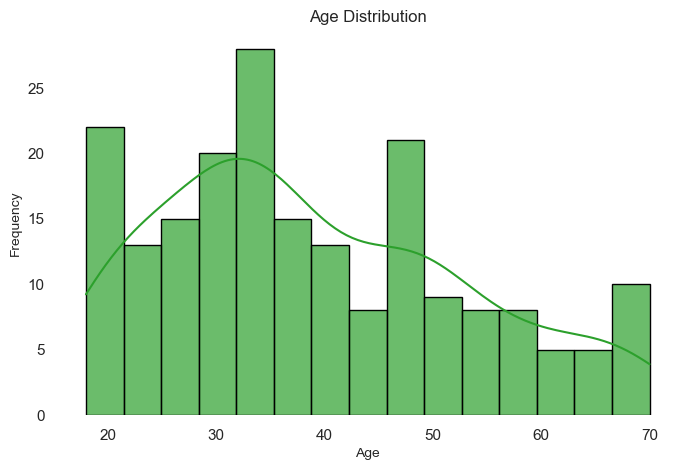

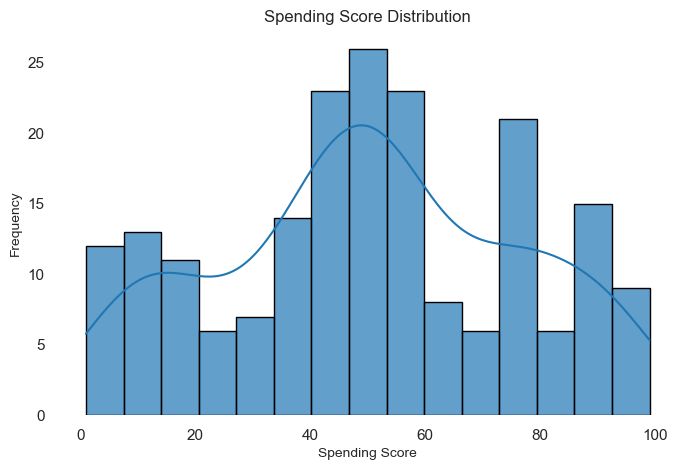

In [27]:
# Set a professional style for the charts
sns.set_theme(style="white")

# Function to format plots professionally
def format_plot(ax, title, xlabel, ylabel):
    ax.set_title(title, fontsize=12)
    ax.set_xlabel(xlabel, fontsize=10)
    ax.set_ylabel(ylabel, fontsize=10)

    # Remove spines for a clean look
    sns.despine(ax=ax, top=True, right=True, left=True, bottom=True)

# Visualize Age Distribution
fig, ax = plt.subplots(figsize=(8, 5))
sns.histplot(df['Age'], bins=15, kde=True, ax=ax, color='#2ca02c', edgecolor='black', alpha=0.7)
format_plot(ax, 'Age Distribution', 'Age', 'Frequency')
plt.show()

# Visualize Spending Score Distribution
fig, ax = plt.subplots(figsize=(8, 5))
sns.histplot(df['Spending Score (1-100)'], bins=15, kde=True, ax=ax, color='#1f77b4', edgecolor='black', alpha=0.7)
format_plot(ax, 'Spending Score Distribution', 'Spending Score', 'Frequency')

# Save the chart with high resolution
plt.savefig('spending_score_distribution.png', format='png', dpi=300, bbox_inches='tight')
plt.show()

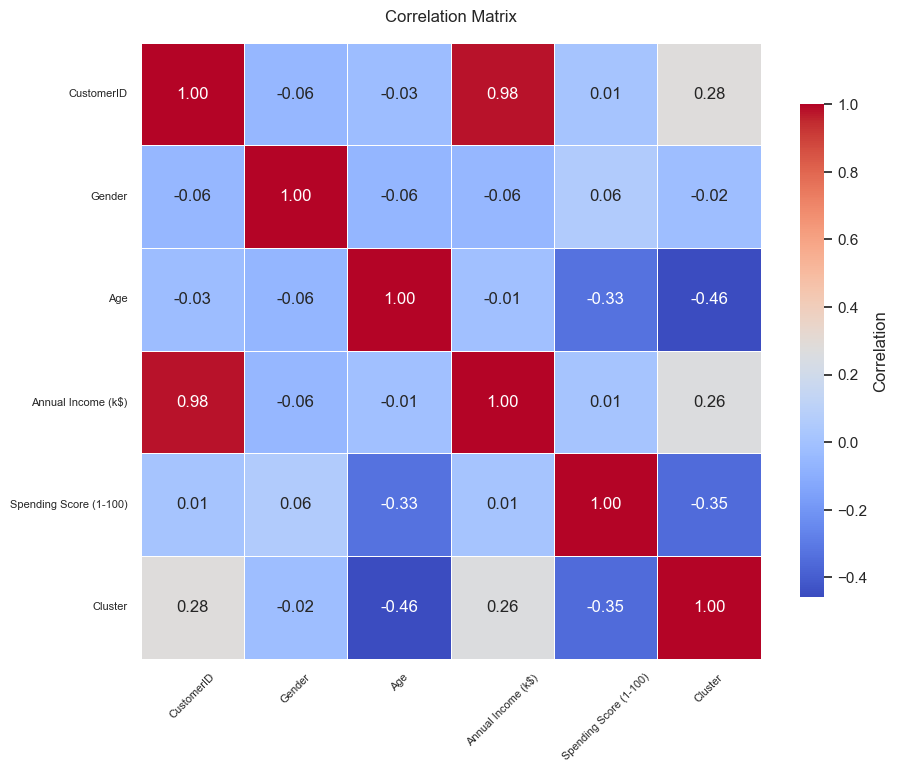

In [29]:
# Set a professional style for Seaborn
sns.set_theme(style="white")

# Plot the correlation matrix heatmap with professional formatting
fig, ax = plt.subplots(figsize=(10, 8))  # Adjust the size for clarity
correlation_matrix = df.corr()

# Create the heatmap
sns.heatmap(
    correlation_matrix, 
    annot=True, 
    fmt=".2f", 
    cmap='coolwarm',  # Use a visually pleasing color palette
    cbar_kws={'shrink': 0.8, 'label': 'Correlation'},  # Adjust colorbar size and label
    linewidths=0.5,  # Add subtle lines between cells
    ax=ax
)

# Add title and customize labels
ax.set_title('Correlation Matrix', fontsize=12, pad=15)
ax.tick_params(axis='x', rotation=45, labelsize=8)  # Rotate and format x-axis labels
ax.tick_params(axis='y', rotation=0, labelsize=8)   # Format y-axis labels

# Remove unnecessary spines for a cleaner look
sns.despine(left=True, bottom=True)

# Save the heatmap with high resolution
plt.savefig('correlation_matrix_.png', format='png', dpi=300, bbox_inches='tight')

# Display the heatmap
plt.show()

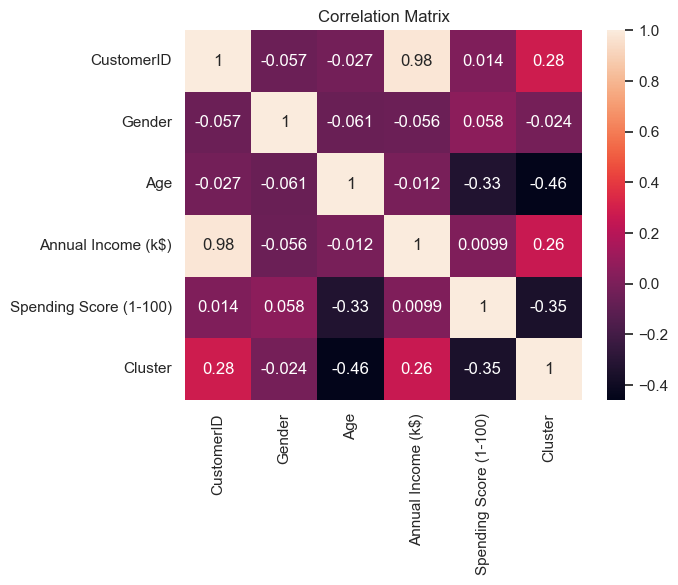

In [30]:
# Correlation matrix heatmap
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Matrix')
plt.savefig('correlation_matrix.png')  # Save heatmap
plt.show()

In [13]:
# Select relevant features
features = df[['Annual Income (k$)', 'Age', 'Spending Score (1-100)']]

# Save selected features
features.to_csv('selected_features.csv', index=False)
print("Selected features saved.")


Selected features saved.


In [16]:
# Scale the Data

In [17]:
# Scale the features and save the scaled data
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)
pd.DataFrame(features_scaled, columns=features.columns).to_csv('scaled_features.csv', index=False)
print("Scaled features saved.")

Scaled features saved.


c:\Users\user\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\user\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\user\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\user\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows wi

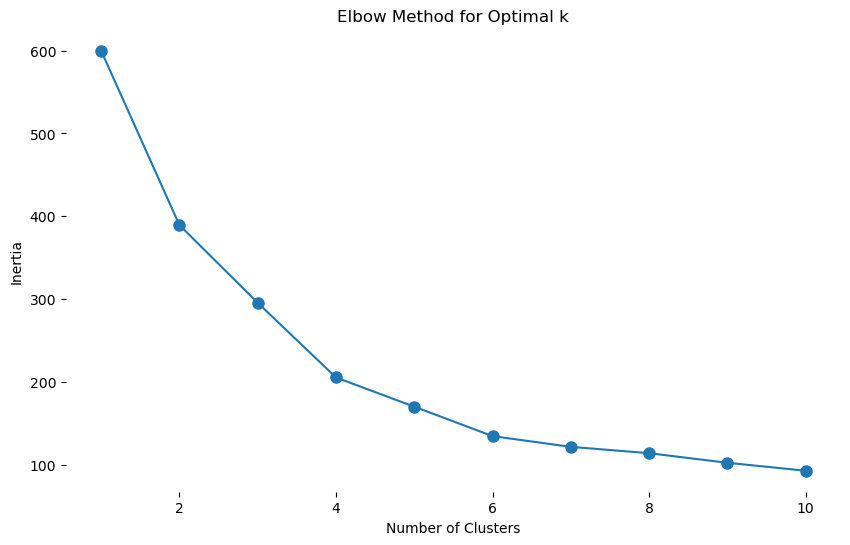

In [20]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Determine the optimal number of clusters using the Elbow Method
inertia = []
K = range(1, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(features_scaled)
    inertia.append(kmeans.inertia_)

# Plot the Elbow curve
fig, ax = plt.subplots(figsize=(10, 6))

ax.plot(K, inertia, marker='o', linestyle='-', color='#1f77b4', markersize=8)
ax.set_xlabel('Number of Clusters', fontsize=10)
ax.set_ylabel('Inertia', fontsize=10)
ax.set_title('Elbow Method for Optimal k', fontsize=12)

# Professional formatting: remove spines and gridlines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.grid(False)

# Save the chart as PNG
plt.savefig('elbow_curve.png', format='png', dpi=300, bbox_inches='tight')

# Display the chart
plt.show()


In [21]:
# Fit the K-Means model with optimal clusters (e.g., 5 clusters)
optimal_k = 5
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df['Cluster'] = kmeans.fit_predict(features_scaled)

# Save the clustered data
df.to_csv('clustered_data.csv', index=False)
print("Clustered data saved.")


Clustered data saved.


c:\Users\user\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


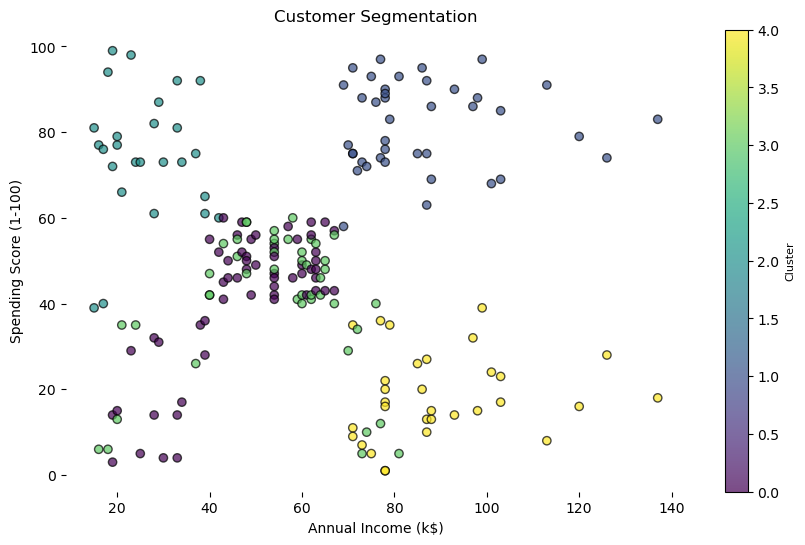

Cluster summary saved.


In [24]:
# Plot and visualize customer clusters
fig, ax = plt.subplots(figsize=(10, 6))

scatter = ax.scatter(
    df['Annual Income (k$)'], 
    df['Spending Score (1-100)'], 
    c=df['Cluster'], 
    cmap='viridis', 
    edgecolor='k', 
    alpha=0.7  # Add transparency for overlapping points
)

# Customize the colorbar
cbar = plt.colorbar(scatter, ax=ax)
cbar.set_label('Cluster', fontsize=8)

# Add title and axis labels
ax.set_title('Customer Segmentation', fontsize=12)
ax.set_xlabel('Annual Income (k$)', fontsize=10)
ax.set_ylabel('Spending Score (1-100)', fontsize=10)

# Professional formatting: Remove spines and gridlines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.grid(False)

# Save the plot with high resolution
plt.savefig('customer_segmentation.png', format='png', dpi=300, bbox_inches='tight')

# Display the plot
plt.show()

# Analyze clusters and save summary as CSV
cluster_summary = df.groupby('Cluster').mean()
cluster_summary.to_csv('cluster_summary.csv')
print("Cluster summary saved.")
